In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/steam-games-dataset/games.csv
/kaggle/input/steam-games-dataset/games.json


In [2]:
# Simple parse of the 'games.json' file.
import os
import json

dataset = {}
if os.path.exists('/kaggle/input/steam-games-dataset/games.json'):
    with open('/kaggle/input/steam-games-dataset/games.json', 'r', encoding='utf-8') as fin:
        text = fin.read()
        if len(text) > 0:
            dataset = json.loads(text)

for app in dataset:
    appID = app                                         # AppID, unique identifier for each app (string).
    game = dataset[app]             

    name = game['name']                                 # Game name (string).
    releaseDate = game['release_date']                  # Release date (string).
    estimatedOwners = game['estimated_owners']          # Estimated owners (string, e.g.: "0 - 20000").
    peakCCU = game['peak_ccu']                          # Number of concurrent users, yesterday (int).
    required_age = game['required_age']                 # Age required to play, 0 if it is for all audiences (int).
    price = game['price']                               # Price in USD, 0.0 if its free (float).
    dlcCount = game['dlc_count']                        # Number of DLCs, 0 if you have none (int).
    longDesc = game['detailed_description']             # Detailed description of the game (string).
    shortDesc = game['short_description']               # Brief description of the game,
                                                        # does not contain HTML tags (string).
    languages = game['supported_languages']             # Comma-separated enumeration of supporting languages.
    fullAudioLanguages = game['full_audio_languages']   # Comma-separated enumeration of languages with audio support.
    reviews = game['reviews']                           #
    headerImage = game['header_image']                  # Header image URL in the store (string).
    website = game['website']                           # Game website (string).
    supportWeb = game['support_url']                    # Game support URL (string).
    supportEmail = game['support_email']                # Game support email (string).
    supportWindows = game['windows']                    # Does it support Windows? (bool).
    supportMac = game['mac']                            # Does it support Mac? (bool).
    supportLinux = game['linux']                        # Does it support Linux? (bool).
    metacriticScore = game['metacritic_score']          # Metacritic score, 0 if it has none (int).
    metacriticURL = game['metacritic_url']              # Metacritic review URL (string).
    userScore = game['user_score']                      # Users score, 0 if it has none (int).
    positive = game['positive']                         # Positive votes (int).
    negative = game['negative']                         # Negative votes (int).
    scoreRank = game['score_rank']                      # Score rank of the game based on user reviews (string).
    achievements = game['achievements']                 # Number of achievements, 0 if it has none (int).
    recommendations = game['recommendations']           # User recommendations, 0 if it has none (int).
    notes = game['notes']                               # Extra information about the game content (string).
    averagePlaytime = game['average_playtime_forever']  # Average playtime since March 2009, in minutes (int).
    averagePlaytime2W = game['average_playtime_2weeks'] # Average playtime in the last two weeks, in minutes (int).
    medianPlaytime = game['median_playtime_forever']    # Median playtime since March 2009, in minutes (int).
    medianPlaytime2W = game['median_playtime_2weeks']   # Median playtime in the last two weeks, in minutes (int).

    packages = game['packages']                         # Available packages.
    for pack in packages:           
        title = pack['title']

In [3]:
import operator

# Sort games by peak CCU in descending order
sorted_games = sorted(dataset.items(), key=lambda x: x[1]['peak_ccu'], reverse=True)

# Get top 10 games
top_10_games = sorted_games[:10]

print("Top 10 Games by Peak CCU:")
print("-------------------------")

genres_count = {}
categories_count = {}
tags_count = {}

for app_id, game in top_10_games:
    print(f"{game['name']} - Peak CCU: {game['peak_ccu']}")
    
    # Count genres
    for genre in game['genres']:
        genres_count[genre] = genres_count.get(genre, 0) + 1
    
    # Count categories
    for category in game['categories']:
        categories_count[category] = categories_count.get(category, 0) + 1
    
    # Count tags
    for tag in game['tags']:
        tags_count[tag] = tags_count.get(tag, 0) + 1

print("\nMost Common Genres:")
for genre, count in sorted(genres_count.items(), key=operator.itemgetter(1), reverse=True)[:5]:
    print(f"{genre}: {count}")

print("\nMost Common Categories:")
for category, count in sorted(categories_count.items(), key=operator.itemgetter(1), reverse=True)[:5]:
    print(f"{category}: {count}")

print("\nMost Common Tags:")
for tag, count in sorted(tags_count.items(), key=operator.itemgetter(1), reverse=True)[:5]:
    print(f"{tag}: {count}")

Top 10 Games by Peak CCU:
-------------------------
Palworld - Peak CCU: 1284268
Black Myth: Wukong - Peak CCU: 1214621
Hogwarts Legacy - Peak CCU: 872138
Counter-Strike: Global Offensive - Peak CCU: 825215
Dota 2 - Peak CCU: 558759
Sons Of The Forest - Peak CCU: 405191
Lost Ark - Peak CCU: 287501
PUBG: BATTLEGROUNDS - Peak CCU: 275374
Apex Legends™ - Peak CCU: 235067
Call of Duty®: Modern Warfare® II - Peak CCU: 233454

Most Common Genres:
Action: 10
Adventure: 7
Free to Play: 5
RPG: 4
Indie: 2

Most Common Categories:
Multi-player: 8
Steam Achievements: 8
Full controller support: 7
Single-player: 6
Co-op: 6

Most Common Tags:
Action: 10
Multiplayer: 8
Co-op: 7
Adventure: 5
RPG: 5


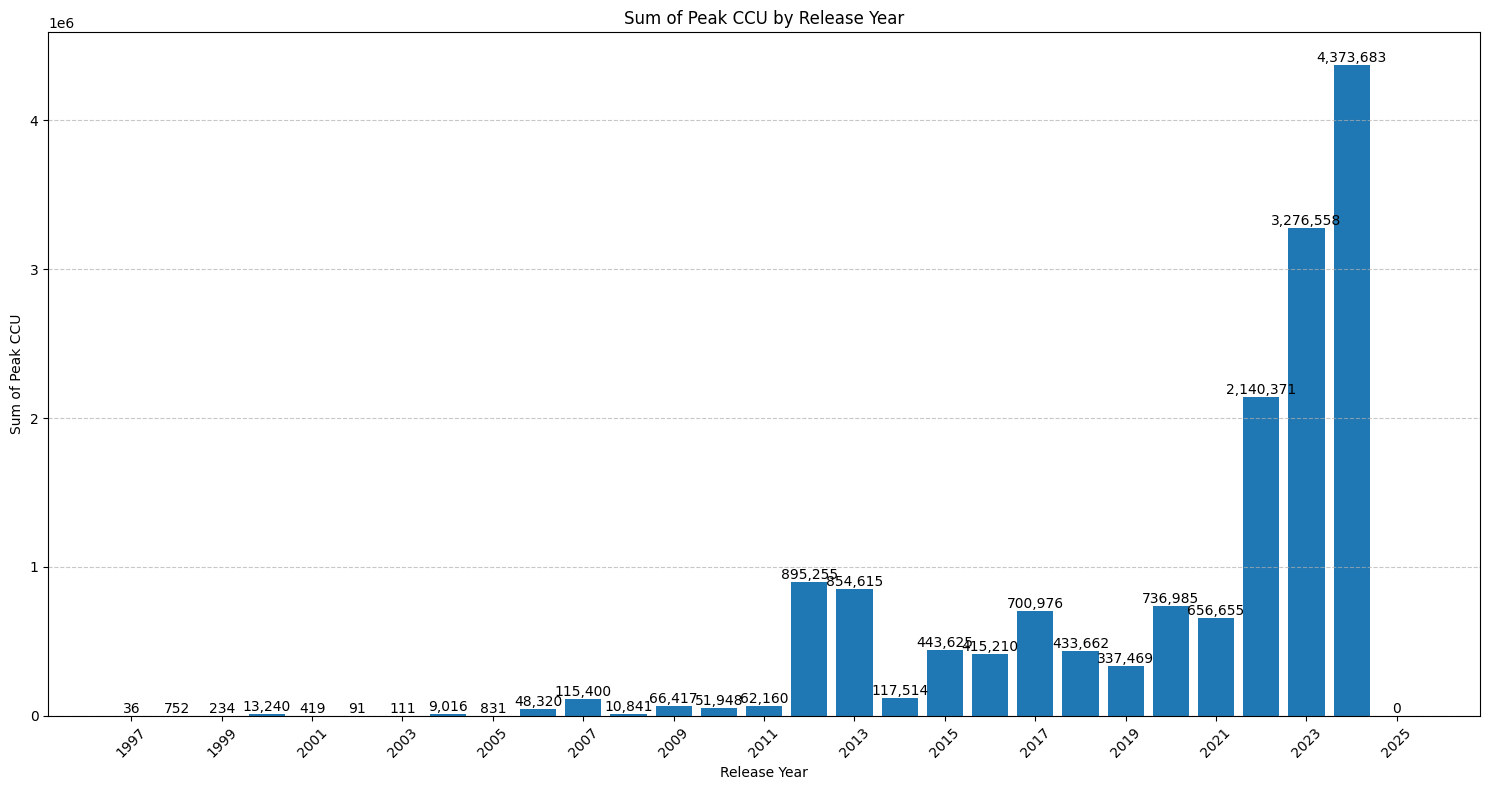

    release_year  peak_ccu
27          2024   4373683
26          2023   3276558
25          2022   2140371
15          2012    895255
16          2013    854615
23          2020    736985
20          2017    700976
24          2021    656655
18          2015    443625
21          2018    433662


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Convert the dataset to a pandas DataFrame
df = pd.DataFrame.from_dict(dataset, orient='index')

# Function to extract year from various date formats
def extract_year(date_string):
    try:
        # Try parsing with different formats
        for fmt in ('%b %d, %Y', '%B %d, %Y', '%Y-%m-%d', '%d %b, %Y', '%d %B, %Y', '%Y'):
            try:
                return datetime.strptime(date_string, fmt).year
            except ValueError:
                continue
        # If no format matches, try to extract year directly
        return int(date_string.split(',')[-1].strip())
    except:
        return None

# Apply the function to extract years
df['release_year'] = df['release_date'].apply(extract_year)

# Filter out rows with None values and years before 1990 (to remove potential errors)
df = df[df['release_year'].notna() & (df['release_year'] >= 1990)]

# Ensure release_year is integer
df['release_year'] = df['release_year'].astype(int)

# Group by year and sum the peak CCU
yearly_ccu = df.groupby('release_year')['peak_ccu'].sum().reset_index()

# Create the bar plot
plt.figure(figsize=(15, 8))
plt.bar(yearly_ccu['release_year'], yearly_ccu['peak_ccu'])
plt.title('Sum of Peak CCU by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Sum of Peak CCU')
plt.xticks(range(int(min(yearly_ccu['release_year'])), int(max(yearly_ccu['release_year']))+1, 2), rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of each bar
for i, v in enumerate(yearly_ccu['peak_ccu']):
    plt.text(yearly_ccu['release_year'][i], v, f'{v:,}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Print some statistics
print(yearly_ccu.sort_values('peak_ccu', ascending=False).head(10))

In [5]:
!pip install prophet

In [12]:
!pip install plotly

In [13]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

In [15]:
import pandas as pd
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from collections import Counter
from datetime import datetime

# Filter out unreleased games and games with zero peak CCU
current_date = datetime.now()
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df_filtered = df[(df['release_date'] <= current_date) & (df['peak_ccu'] > 0)]

# Prepare data for Prophet
prophet_df = df_filtered.groupby('release_year')['peak_ccu'].sum().reset_index()
prophet_df.columns = ['ds', 'y']
prophet_df['ds'] = pd.to_datetime(prophet_df['ds'], format='%Y')

# Create and fit the model
model = Prophet(yearly_seasonality=True)
model.fit(prophet_df)

# Create future dates for prediction
future_dates = model.make_future_dataframe(periods=1, freq='Y')

# Make predictions
forecast = model.predict(future_dates)

# Create the plot using Plotly
fig = make_subplots(rows=1, cols=1, subplot_titles=['Peak CCU Forecast'])

# Add actual data points
fig.add_trace(
    go.Scatter(x=prophet_df['ds'], y=prophet_df['y'], mode='markers', name='Actual', marker=dict(color='blue'))
)

# Add forecast line
fig.add_trace(
    go.Scatter(x=forecast['ds'], y=forecast['yhat'], mode='lines', name='Forecast', line=dict(color='red'))
)

# Add uncertainty intervals
fig.add_trace(
    go.Scatter(
        x=forecast['ds'].tolist() + forecast['ds'].tolist()[::-1],
        y=forecast['yhat_upper'].tolist() + forecast['yhat_lower'].tolist()[::-1],
        fill='toself',
        fillcolor='rgba(0,100,80,0.2)',
        line=dict(color='rgba(255,255,255,0)'),
        name='Confidence Interval'
    )
)

fig.update_layout(
    title='Peak CCU Forecast (Released Games Only)',
    xaxis_title='Year',
    yaxis_title='Peak CCU',
    legend_title='Legend',
    hovermode='x unified'
)

fig.show()

# Print the predicted value for the next year
next_year_prediction = forecast[forecast['ds'].dt.year == max(forecast['ds'].dt.year)]['yhat'].values[0]
print(f"Predicted Peak CCU for next year: {next_year_prediction:.0f}")

# Analyze top contributing games for the latest year
latest_year = df_filtered['release_year'].max()
top_games = df_filtered[df_filtered['release_year'] == latest_year].sort_values('peak_ccu', ascending=False).head(10)

# Collect genres, categories, and tags
all_genres = []
all_categories = []
all_tags = []

for _, game in top_games.iterrows():
    all_genres.extend(game['genres'])
    all_categories.extend(game['categories'])
    all_tags.extend(game['tags'])

# Count occurrences
print("\nTop 5 Genres:")
print(Counter(all_genres).most_common(5))

print("\nTop 5 Categories:")
print(Counter(all_categories).most_common(5))

print("\nTop 5 Tags:")
print(Counter(all_tags).most_common(5))

20:46:54 - cmdstanpy - INFO - Chain [1] start processing
20:46:54 - cmdstanpy - INFO - Chain [1] done processing
/opt/conda/lib/python3.10/site-packages/prophet/forecaster.py:1854: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.



Predicted Peak CCU for next year: 1867825

Top 5 Genres:
[('Action', 9), ('Adventure', 6), ('RPG', 6), ('Early Access', 5), ('Indie', 2)]

Top 5 Categories:
[('Single-player', 8), ('Steam Achievements', 8), ('Steam Cloud', 7), ('Multi-player', 6), ('Co-op', 6)]

Top 5 Tags:
[('Action', 9), ('Singleplayer', 8), ('Multiplayer', 6), ('Open World', 6), ('Adventure', 6)]


In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define 'high' peak CCU (e.g., top 25% of games)
high_ccu_threshold = df['peak_ccu'].quantile(0.75)

# Create target variable
df['high_ccu'] = (df['peak_ccu'] >= high_ccu_threshold).astype(int)

# Select features for the model
features = ['price', 'required_age', 'achievements', 'positive', 'negative', 'average_playtime_forever', 'median_playtime_forever', 'estimated_owners']

# Convert 'estimated_owners' to numeric (assuming it's a range like "0 - 20000")
df['estimated_owners'] = df['estimated_owners'].apply(lambda x: int(x.split('-')[1].strip()))

# Prepare the feature matrix X and target vector y
X = df[features]
y = df['high_ccu']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))
print(classification_report(y_test, lr_pred))

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

# XGBoost
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_pred))
print(classification_report(y_test, xgb_pred))

# Feature importance for Random Forest
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nRandom Forest Feature Importance:")
print(feature_importance)

Logistic Regression Accuracy: 0.8055612664473685
              precision    recall  f1-score   support

           0       0.80      0.98      0.88     14473
           1       0.83      0.30      0.44      4983

    accuracy                           0.81     19456
   macro avg       0.82      0.64      0.66     19456
weighted avg       0.81      0.81      0.77     19456

Random Forest Accuracy: 0.8314144736842105
              precision    recall  f1-score   support

           0       0.86      0.92      0.89     14473
           1       0.71      0.57      0.63      4983

    accuracy                           0.83     19456
   macro avg       0.79      0.75      0.76     19456
weighted avg       0.82      0.83      0.82     19456

XGBoost Accuracy: 0.845446134868421
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     14473
           1       0.78      0.55      0.64      4983

    accuracy                           0.85     19456


In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Remove games with 0 CCU
df_filtered = df[df['peak_ccu'] > 0].copy()

# Calculate average CCU
average_ccu = df_filtered['peak_ccu'].mean()

# Create target variable (1 if above average, 0 if below)
df_filtered['above_average_ccu'] = (df_filtered['peak_ccu'] > average_ccu).astype(int)

# Select features for the model
features = ['price', 'required_age', 'achievements', 'positive', 'negative', 'average_playtime_forever', 'median_playtime_forever', 'estimated_owners']

# Convert 'estimated_owners' to numeric
def convert_owners(x):
    if isinstance(x, str):
        return int(x.split('-')[1].strip())
    return x

df_filtered['estimated_owners'] = df_filtered['estimated_owners'].apply(convert_owners)

# Prepare the feature matrix X and target vector y
X = df_filtered[features]
y = df_filtered['above_average_ccu']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))
print(classification_report(y_test, lr_pred))

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

# XGBoost
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_pred))
print(classification_report(y_test, xgb_pred))

# Feature importance for Random Forest
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nRandom Forest Feature Importance:")
print(feature_importance)

# Print the average CCU
print(f"\nAverage CCU (excluding 0 CCU games): {average_ccu:.2f}")

Logistic Regression Accuracy: 0.9576119402985075
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      4768
           1       0.71      0.29      0.41       257

    accuracy                           0.96      5025
   macro avg       0.84      0.64      0.69      5025
weighted avg       0.95      0.96      0.95      5025

Random Forest Accuracy: 0.9649751243781095
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4768
           1       0.81      0.41      0.55       257

    accuracy                           0.96      5025
   macro avg       0.89      0.70      0.76      5025
weighted avg       0.96      0.96      0.96      5025

XGBoost Accuracy: 0.9627860696517413
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4768
           1       0.74      0.42      0.54       257

    accuracy                           0.96      5025

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Remove games with 0 CCU
df_filtered = df[df['peak_ccu'] > 0].copy()

# Calculate average CCU
average_ccu = df_filtered['peak_ccu'].mean()

# Create target variable (1 if above average, 0 if below)
df_filtered['above_average_ccu'] = (df_filtered['peak_ccu'] > average_ccu).astype(int)

# Select features for the model
features = ['price', 'required_age', 'achievements', 'positive', 'negative', 'average_playtime_forever', 'median_playtime_forever']

# Prepare the feature matrix X and target vector y
X = df_filtered[features]
y = df_filtered['above_average_ccu']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))
print(classification_report(y_test, lr_pred))

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

# XGBoost
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_pred))
print(classification_report(y_test, xgb_pred))

# Feature importance for Random Forest
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nRandom Forest Feature Importance:")
print(feature_importance)

# Print the average CCU
print(f"\nAverage CCU (excluding 0 CCU games): {average_ccu:.2f}")

Logistic Regression Accuracy: 0.9576119402985075
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      4768
           1       0.71      0.29      0.41       257

    accuracy                           0.96      5025
   macro avg       0.84      0.64      0.69      5025
weighted avg       0.95      0.96      0.95      5025

Random Forest Accuracy: 0.9635820895522388
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4768
           1       0.78      0.40      0.53       257

    accuracy                           0.96      5025
   macro avg       0.87      0.70      0.76      5025
weighted avg       0.96      0.96      0.96      5025

XGBoost Accuracy: 0.9621890547263682
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4768
           1       0.72      0.43      0.54       257

    accuracy                           0.96      5025